In [9]:
pip install librosa

     ------------------------------------- 260.7/260.7 KB 15.7 MB/s eta 0:00:00
     ---------------------------------------- 74.7/74.7 KB ? eta 0:00:00
     ---------------------------------------- 64.6/64.6 KB ? eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 21.9 MB/s eta 0:00:00
     -------------------------------------- 166.9/166.9 KB 9.8 MB/s eta 0:00:00
     ---------------------------------------- 2.8/2.8 MB 22.5 MB/s eta 0:00:00
     --------------------------------------- 30.3/30.3 MB 16.8 MB/s eta 0:00:00
     ---------------------------------------- 181.3/181.3 KB ? eta 0:00:00
     ---------------------------------------- 117.6/117.6 KB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Aman\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [10]:
pip install opencv-python

     --------------------------------------- 39.5/39.5 MB 18.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Aman\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [11]:
pip install tqdm

     ---------------------------------------- 78.5/78.5 KB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\Aman\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [12]:
pip install matplotlib

     ---------------------------------------- 8.1/8.1 MB 22.4 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 23.3 MB/s eta 0:00:00
     -------------------------------------- 111.1/111.1 KB 6.7 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 20.9 MB/s eta 0:00:00
     ------------------------------------- 218.6/218.6 KB 13.9 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 KB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\Aman\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [13]:
import os
import librosa
import numpy as np
import cv2
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import matplotlib.pyplot as plt

# Set your dataset path
DATASET_PATH = "C:\\MLA_Project\\audio_speech_actors_01-24"

# Initialize lists
X = []
Y = []

# Emotion labels based on RAVDESS naming convention
emotion_dict = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

# Function to extract emotion from filename
def get_emotion(filename):
    parts = filename.split('-')
    emotion_code = parts[2]
    return emotion_dict.get(emotion_code, 'unknown')

# Parameters
n_mels = 128
duration = 3  # seconds
sr = 22050
max_len = sr * duration  # 66150 samples

# Traverse folders
for root, dirs, files in os.walk(DATASET_PATH):
    for file in tqdm(files):
        if file.endswith(".wav"):
            try:
                file_path = os.path.join(root, file)
                emotion = get_emotion(file)

                # Load audio
                y, _ = librosa.load(file_path, sr=sr)

                # Trim silence
                y, _ = librosa.effects.trim(y)

                # Normalize
                y = librosa.util.normalize(y)

                # Pad or cut
                if len(y) < max_len:
                    y = np.pad(y, (0, max_len - len(y)))
                else:
                    y = y[:max_len]

                # Mel Spectrogram
                mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
                mel_db = librosa.power_to_db(mel, ref=np.max)

                # Resize to 128x128
                mel_resized = cv2.resize(mel_db, (128, 128))

                # Expand dims for CNN
                mel_resized = np.expand_dims(mel_resized, axis=-1)  # (128,128,1)

                X.append(mel_resized)
                Y.append(emotion)

            except Exception as e:
                print(f"Error processing {file_path}: {e}")

# Convert to numpy
X = np.array(X)
Y = np.array(Y)

print("Processed:", X.shape, Y.shape)


0it [00:00, ?it/s]
100%|██████████| 60/60 [00:00<00:00, 82.26it/s]

Processed: (1440, 128, 128, 1) (1440,)


In [14]:
le = LabelEncoder()
Y_encoded = le.fit_transform(Y)
print("Classes:", list(le.classes_))

Classes: [np.str_('angry'), np.str_('calm'), np.str_('disgust'), np.str_('fearful'), np.str_('happy'), np.str_('neutral'), np.str_('sad'), np.str_('surprised')]


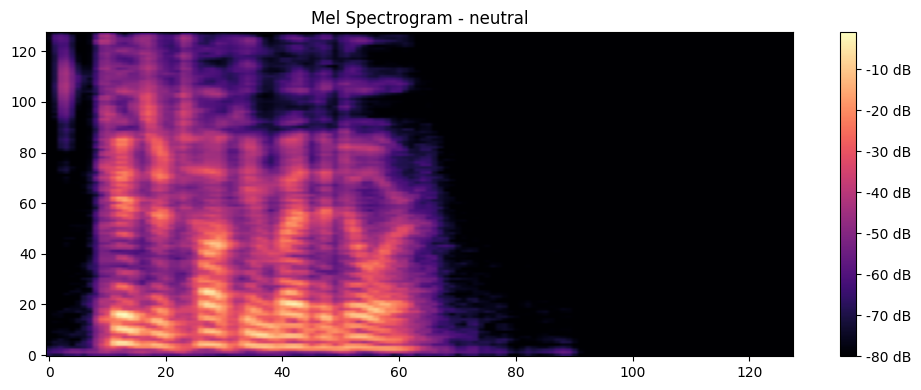

In [15]:
plt.figure(figsize=(10,4))
plt.imshow(X[0].squeeze(), aspect='auto', origin='lower', cmap='magma')
plt.title(f"Mel Spectrogram - {Y[0]}")
plt.colorbar(format="%+2.0f dB")
plt.tight_layout()
plt.show()


In [2]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.Collecting tensorflow
     -------------------------------------- 375.7/375.7 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 9.4 MB/s eta 0:00:00
     ------------------------------------- 434.5/434.5 KB 13.7 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 KB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 135.6/135.6 KB ? eta 0:00:00
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
     ---------------------------------------- 5.5/5.5 MB 8.8 MB/s eta 0:00:00
  Using cached numpy-2.1.3-cp310-cp310-win_amd64.whl (12.9 MB)
     ---------------------------------------- 3.0/3.0 MB 9.9 MB/s eta 0:00:00
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl (26.4 MB)
  Using cached termcolor-3.0.1-py3-none-any.whl (7.2 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl (30 kB)
  Using cached grpcio-1.71.0-cp310-cp310-win_amd64.whl (

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\Users\\Aman\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\clang\\native\\libclang.dll'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\Users\Aman\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install scikit-learn

     ---------------------------------------- 11.1/11.1 MB 5.2 MB/s eta 0:00:00
     ---------------------------------------- 41.2/41.2 MB 7.0 MB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 KB 6.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Aman\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [25]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Reshape, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

# Normalize input
X = X.astype('float32') / 255.0

# Split
X_train, X_test, y_train, y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42, stratify=Y_encoded)
num_classes = len(np.unique(Y_encoded))
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

# Model
input_layer = Input(shape=(128, 128, 1))

x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)  # (64, 64, 64)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)  # (32, 32, 128)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)  # (16, 16, 256)

# Reshape to 3D for LSTM
x = Reshape((256, 256))(x)  # 16*16 = 256 time steps, 256 features per step

x = LSTM(128, return_sequences=False)(x)
x = Dropout(0.5)(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train_cat,
                    validation_data=(X_test, y_test_cat),
                    epochs=30,
                    batch_size=32)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")


Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.1435 - loss: 2.2070 - val_accuracy: 0.1319 - val_loss: 2.0757
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.1780 - loss: 2.0641 - val_accuracy: 0.1319 - val_loss: 2.0982
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.2100 - loss: 1.9967 - val_accuracy: 0.1319 - val_loss: 2.1142
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.1772 - loss: 2.0532 - val_accuracy: 0.1319 - val_loss: 2.1399
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.2135 - loss: 1.9945 - val_accuracy: 0.1493 - val_loss: 2.1578
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.2226 - loss: 1.9481 - val_accuracy: 0.1319 - val_loss: 2.1552
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.2350 - loss: 1.9313 - val_accuracy: 0.1319 - val_loss: 2.1811
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.2413 - loss: 1.9228 - val_accuracy: 0.1319 - val_loss:

In [26]:
import random

# Pick random test sample
idx = random.randint(0, len(X_test) - 1)
sample = np.expand_dims(X_test[idx], axis=0)

# Prediction
pred = model.predict(sample)
predicted_class = le.inverse_transform([np.argmax(pred)])[0]
actual_class = le.inverse_transform([np.argmax(y_test_cat[idx])])[0]

print(f"\n🔮 Predicted Emotion: {predicted_class}")
print(f"🎯 Actual Emotion: {actual_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 942ms/step

🔮 Predicted Emotion: disgust
🎯 Actual Emotion: calm


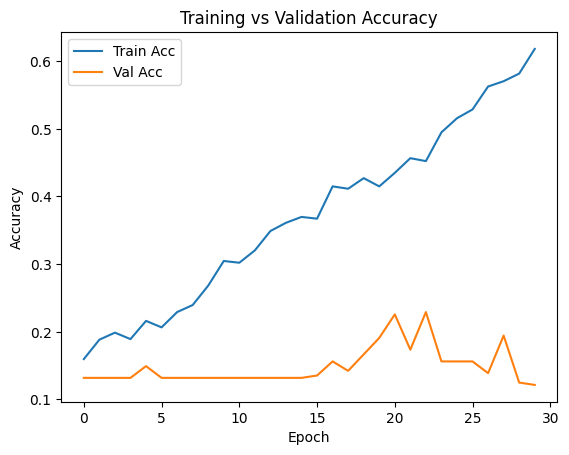

In [27]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


YO THIS IS NEWWW

📂 Detected Emotion Classes:
0: angry
1: calm
2: disgust
3: fearful
4: happy
5: neutral
6: sad
7: surprised


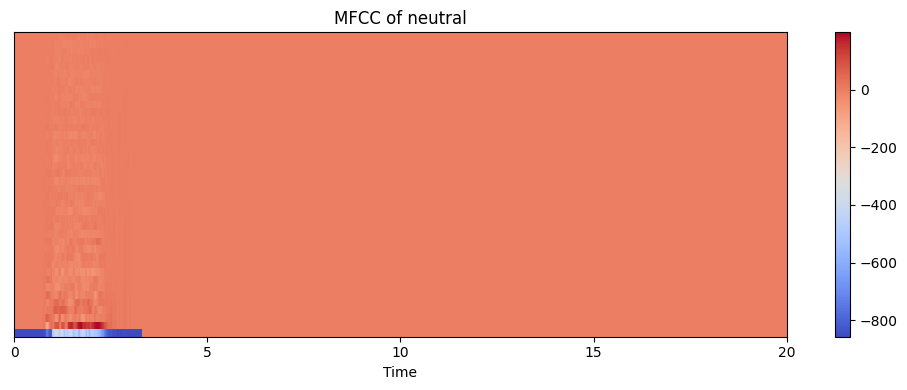

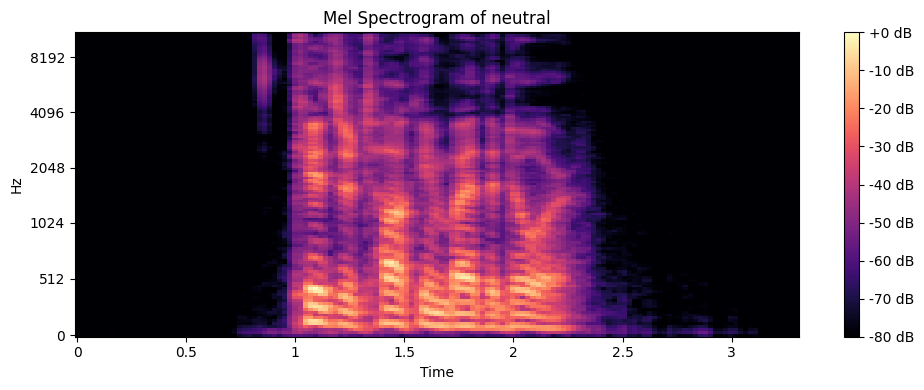

In [65]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Constants
DATA_DIR = "C:\\MLA_Project\\all_wav"
SAMPLE_RATE = 22050
MAX_PAD_LEN = 862  # Tune based on dataset

# Emotion Mapping based on RAVDESS filename format
emotion_map = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

# Load and preprocess data
X, labels = [], []

for file in os.listdir(DATA_DIR):
    if file.endswith(".wav"):
        emotion_id = file.split("-")[2]
        if emotion_id in emotion_map:
            emotion = emotion_map[emotion_id]
            file_path = os.path.join(DATA_DIR, file)
            y, sr = librosa.load(file_path, sr=SAMPLE_RATE)
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
            # Padding or truncating MFCCs
            if mfcc.shape[1] < MAX_PAD_LEN:
                pad_width = MAX_PAD_LEN - mfcc.shape[1]
                mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
            else:
                mfcc = mfcc[:, :MAX_PAD_LEN]
            X.append(mfcc)
            labels.append(emotion)

X = np.array(X)
X = X[..., np.newaxis]  # Shape: (samples, 40, 862, 1)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)
y = to_categorical(y)

# Print all classes detected
classes = list(label_encoder.classes_)
print("📂 Detected Emotion Classes:")
for idx, c in enumerate(classes):
    print(f"{idx}: {c}")

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Pick a sample for plotting
sample_index = 0
sample_path = os.path.join(DATA_DIR, os.listdir(DATA_DIR)[sample_index])
y_sample, sr_sample = librosa.load(sample_path, sr=SAMPLE_RATE)

# Plot MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(X[sample_index].squeeze(), x_axis='time')
plt.title(f'MFCC of {labels[sample_index]}')
plt.colorbar()
plt.tight_layout()
plt.show()

# Plot Mel Spectrogram
S = librosa.feature.melspectrogram(y=y_sample, sr=sr_sample, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr_sample, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Mel Spectrogram of {labels[sample_index]}')
plt.tight_layout()
plt.show()


In [31]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D, Dropout, Reshape,
    LSTM, Dense, BatchNormalization
)
from tensorflow.keras.optimizers import Adam

# Input shape: (n_mfcc, max_pad_len, 1)
input_shape = (40, MAX_PAD_LEN, 1)
num_classes = y.shape[1]

inputs = Input(shape=input_shape)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.3)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.3)(x)

# Reshape before LSTM
x = Reshape((x.shape[1], x.shape[2] * x.shape[3]))(x)

x = LSTM(128, return_sequences=False)(x)
x = Dropout(0.3)(x)

x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)

outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 40, 862, 1)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 40, 862, 64)    │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 40, 862, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 20, 431, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 20, 431, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 20, 431, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 20, 431, 128)   │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 10, 215, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 10, 215, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_9 (Reshape)             │ (None, 10, 27520)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 128)            │    14,156,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,240,328 (54.32 MB)

 Trainable params: 14,239,944 (54.32 MB)

 Non-trainable params: 384 (1.50 KB)

In [34]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=40,
    batch_size=32)

# 🔽 Save the trained model
model.save("cnn_lstm_speech_emotion.h5")


Epoch 1/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 182s 5s/step - accuracy: 0.1999 - loss: 2.0069 - val_accuracy: 0.2882 - val_loss: 1.9296
Epoch 2/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 95s 3s/step - accuracy: 0.2043 - loss: 1.9604 - val_accuracy: 0.2847 - val_loss: 1.8974
Epoch 3/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.2817 - loss: 1.8443 - val_accuracy: 0.2812 - val_loss: 1.8754
Epoch 4/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.3039 - loss: 1.8080 - val_accuracy: 0.3403 - val_loss: 1.8224
Epoch 5/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.3367 - loss: 1.7640 - val_accuracy: 0.3090 - val_loss: 1.8039
Epoch 6/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.3484 - loss: 1.7295 - val_accuracy: 0.3368 - val_loss: 1.7584
Epoch 7/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.3677 - loss: 1.6426 - val_accuracy: 0.3090 - val_loss: 1.7780
Epoch 8/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.4007 - loss: 1.6180 - val_accuracy: 0.3090 - val_loss

In [55]:
# Evaluate on validation data
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"🔍 Validation Accuracy: {val_acc:.4f}")
print(f"📉 Validation Loss: {val_loss:.4f}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 379ms/step - accuracy: 0.4872 - loss: 1.5294
🔍 Validation Accuracy: 0.4931
📉 Validation Loss: 1.5058


C:\Users\Aman\AppData\Local\Temp\ipykernel_12512\816485515.py:24: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Aman\AppData\Local\Temp\ipykernel_12512\816485515.py:24: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Aman\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Aman\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


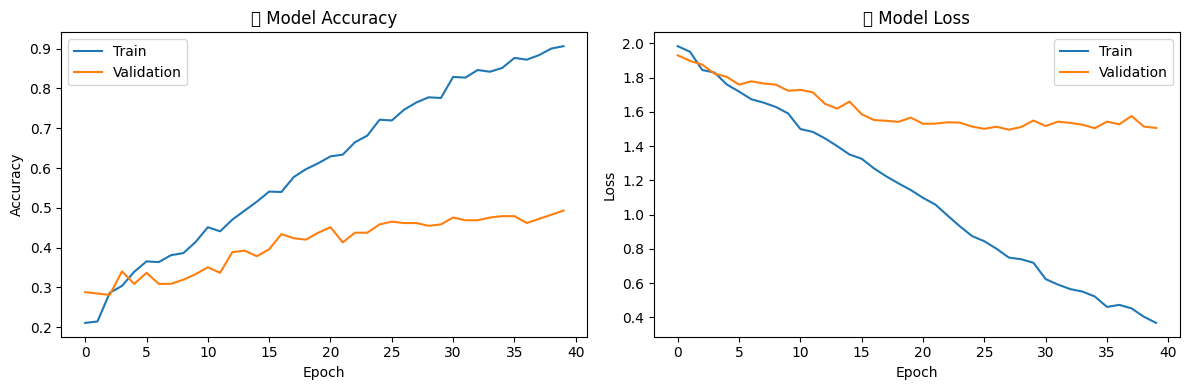

In [56]:
# Plot training & validation accuracy and loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('📈 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('📉 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [57]:
# Predict on validation data
y_pred = model.predict(X_val)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_val, axis=1)

# Get label mapping back
predicted_emotions = label_encoder.inverse_transform(y_pred_labels)
actual_emotions = label_encoder.inverse_transform(y_true_labels)

# Print some predictions vs actuals
for i in range(10):
    print(f"🔊 Sample {i+1}: Predicted: {predicted_emotions[i]}, Actual: {actual_emotions[i]}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 351ms/step
🔊 Sample 1: Predicted: fearful, Actual: calm
🔊 Sample 2: Predicted: calm, Actual: sad
🔊 Sample 3: Predicted: surprised, Actual: fearful
🔊 Sample 4: Predicted: happy, Actual: neutral
🔊 Sample 5: Predicted: disgust, Actual: happy
🔊 Sample 6: Predicted: disgust, Actual: disgust
🔊 Sample 7: Predicted: angry, Actual: angry
🔊 Sample 8: Predicted: happy, Actual: neutral
🔊 Sample 9: Predicted: angry, Actual: angry
🔊 Sample 10: Predicted: surprised, Actual: surprised


C:\Users\Aman\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


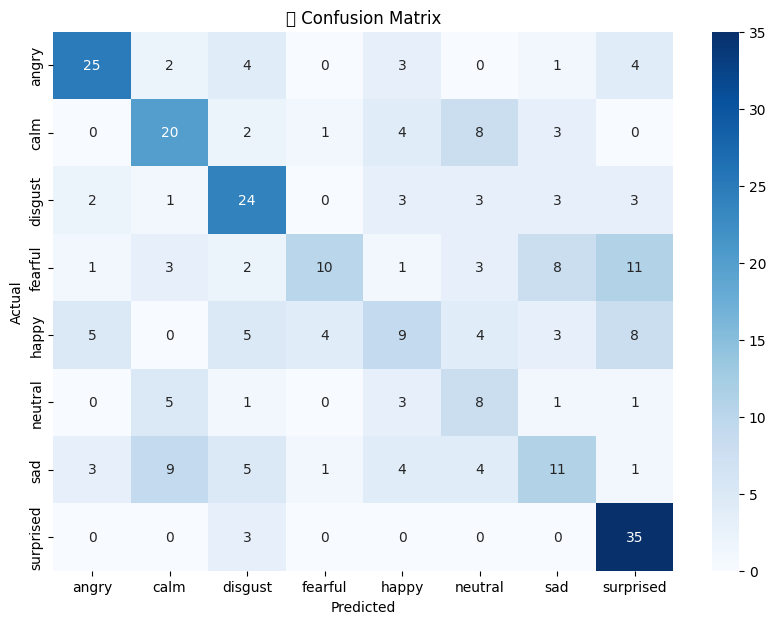

              precision    recall  f1-score   support

       angry       0.69      0.64      0.67        39
        calm       0.50      0.53      0.51        38
     disgust       0.52      0.62      0.56        39
     fearful       0.62      0.26      0.36        39
       happy       0.33      0.24      0.28        38
     neutral       0.27      0.42      0.33        19
         sad       0.37      0.29      0.32        38
   surprised       0.56      0.92      0.69        38

    accuracy                           0.49       288
   macro avg       0.48      0.49      0.47       288
weighted avg       0.50      0.49      0.48       288



In [58]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('🎯 Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true_labels, y_pred_labels, target_names=label_encoder.classes_))


In [82]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import random

# Load model and dataset
model = load_model("cnn_lstm_speech_emotion.h5")
data_moods = pd.read_csv("data_moods.csv")

# Define emotion-to-mood mapping
emotion_to_mood = {
    'angry': 'calm',
    'disgust': 'calm',
    'fear': 'calm',
    'happy': 'happy',
    'sad': 'happy',
    'surprise': 'happy',
    'neutral': 'energetic'
}

# Your emotion labels (same order used during training)
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Always pick a safe index within the size of X_test
num_test_samples = X_test.shape[0]
random_index = np.random.randint(0, 288)

# Extract sample and label safely
sample = X_test[random_index:random_index + 1]  # shape: (1, 40, 862, 1)
true_label = int(y_test[random_index])          # single integer

# Predict emotion
predicted_probs = model.predict(sample)
predicted_label = np.argmax(predicted_probs)

# Decode label to emotion string (if using LabelEncoder)
predicted_emotion = label_encoder.inverse_transform([predicted_label])[0]

print("Predicted Emotion:", predicted_emotion)
print("True Emotion:", label_encoder.inverse_transform([true_label])[0])

# Map to mood
recommended_mood = emotion_to_mood[predicted_emotion]
print(f"🎧 Recommending songs for mood: {recommended_mood}")

# Filter and recommend songs
recommended_songs = data_moods[data_moods['mood'].str.lower() == recommended_mood.lower()]
recommended_sample = recommended_songs.sample(n=5)

print("\n🎶 Recommended Songs:")
for i, row in recommended_sample.iterrows():
    print(f"- {row['name']} by {row['artist']} ({row['mood']})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Emotion: disgust
True Emotion: surprised
🎧 Recommending songs for mood: calm

🎶 Recommended Songs:
- De Fléche by Les Manger Tous (Calm)
- Intermezzo No. 1 in E Minor by Manuel Ponce (Calm)
- Momentum by Monocle Twins (Calm)
- Fields After Rain by Martèn LeGrand (Calm)
- She Remembers (Piano Solo) by Pieter Savenberg (Calm)
